# Import libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tfimm

import matplotlib.pyplot as plt
import pandas as pd

## Path

In [3]:
import pathlib
data_dir_train = pathlib.Path(r"C:\Users\lulu5\Documents\train")
data_dir_test = pathlib.Path(r"C:\Users\lulu5\Documents\test")
#Nombre images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_train, image_count_test)

2072 245


In [100]:
batch_size = 32
img_height = 224
img_width = 224

## Data augmentation

In [101]:
TFs = {#'height_shift_range':  .5,
       "horizontal_flip": True,
       "vertical_flip": True,
       "rotation_range": 30,
       "featurewise_std_normalization": True,
       "brightness_range": (1, 2)
       # other transformation your want
       # ...
       }
datagen = ImageDataGenerator(**TFs)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [102]:
train_generator = datagen.flow_from_directory(
    data_dir_train,
    color_mode="rgb",
    batch_size=batch_size,
    target_size=(img_height, img_width),
    shuffle=True,
    class_mode='binary')

test_flow = datagen.flow_from_directory(
    data_dir_test,
    color_mode="rgb",
    batch_size=batch_size,
    target_size=(img_height, img_width),
    shuffle=True,
    class_mode='binary')

Found 2072 images belonging to 10 classes.
Found 245 images belonging to 1 classes.


In [103]:
batch_x, batch_y = next(train_generator)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


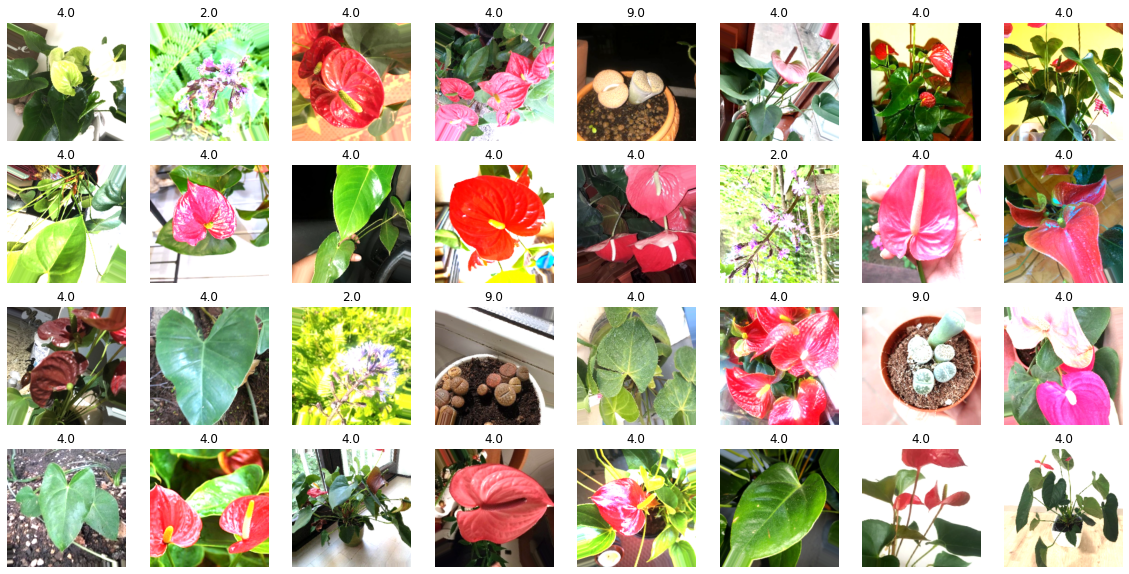

In [104]:
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(20, 10))

for i in range(batch_x.shape[0]):
    plt.subplot(4, 8, i+1)
    image = batch_x[i].astype('uint8')
    label = batch_y[i]
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')


In [105]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names
)

Found 2072 files belonging to 10 classes.
Using 1658 files for training.
['1373231', '1393242', '1393414', '1396159', '1409238', '1411462', '1412445', '1413751', '1414746', '1418140']


# Modèle

In [151]:
def plot_hist(history):
    #Accuracy
    plt.subplot(131)
    plt.plot(history.history['accuracy']    ,'--',     label='accuracy', c='g')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.05])
    #sparse_top_k_categorical_accuracy
    plt.subplot(132)
    plt.plot(history.history['sparse_top_k_categorical_accuracy']  ,'--'  ,      label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy top-5')
    plt.ylim([0.0, 1.05])
    #Loss
    plt.subplot(133)
    plt.plot(history.history['loss']    ,'--',     label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_hist_plus(history):
    plt.subplot(131)
    plt.plot(history.history['accuracy']    ,'--',     label='accuracy', c='g')
    plt.plot(history.history['val_accuracy'],     label = 'val_accuracy', c='g')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.05])
    plt.subplot(132)
    plt.plot(history.history['sparse_top_k_categorical_accuracy']  ,'--'  ,      label='accuracy')
    plt.plot(history.history['val_sparse_top_k_categorical_accuracy'],      label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy top-5')
    plt.ylim([0.0, 1.05])
    plt.subplot(133)
    plt.plot(history.history['loss']    ,'--',     label='loss')
    plt.plot(history.history['val_loss'],     label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

## Modèle mobile

In [107]:
mobile_model = tf.keras.applications.MobileNetV3Small(
    input_shape=None, alpha=1.0, minimalistic=True, include_top=True,
    weights='imagenet', input_tensor=None, classes=1000, pooling=None,
    dropout_rate=0.2, classifier_activation='softmax',
    include_preprocessing=True
)

In [108]:
mobile_model.compile(optimizer="Adam", 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy', 'sparse_top_k_categorical_accuracy'])

In [109]:
history_mobile = mobile_model.fit(train_generator, epochs=10,batch_size=batch_size, verbose=1,
steps_per_epoch=3, validation_steps=1)

Epoch 1/10


C:\Users\lulu5\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 5s 966ms/step - loss: 4.3503 - accuracy: 0.4479 - sparse_top_k_categorical_accuracy: 0.5312
Epoch 2/10
3/3 [==============================] - 3s 965ms/step - loss: 0.9638 - accuracy: 0.8021 - sparse_top_k_categorical_accuracy: 0.9583
Epoch 3/10
3/3 [==============================] - 3s 988ms/step - loss: 1.5245 - accuracy: 0.8229 - sparse_top_k_categorical_accuracy: 0.9271
Epoch 4/10
3/3 [==============================] - 3s 970ms/step - loss: 0.5015 - accuracy: 0.8854 - sparse_top_k_categorical_accuracy: 0.9896
Epoch 5/10
3/3 [==============================] - 3s 952ms/step - loss: 0.4663 - accuracy: 0.8958 - sparse_top_k_categorical_accuracy: 0.9688
Epoch 6/10
3/3 [==============================] - 3s 917ms/step - loss: 0.3285 - accuracy: 0.9375 - sparse_top_k_categorical_accuracy: 0.9896
Epoch 7/10
3/3 [==============================] - 3s 944ms/step - loss: 0.4511 - accuracy: 0.8854 - sparse_top_k_categorical_accuracy: 0.9792
Epoch 8/10
3/3 [=

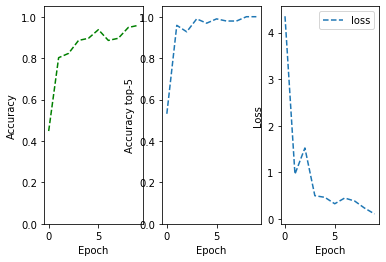

In [143]:
plot_hist(history_mobile)

## Restnet

In [144]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000)

In [145]:
from keras.models import Model, Sequential
from keras.layers import Dense,GlobalAveragePooling2D,Dropout

model_V1bis = Sequential()
extracted_layer= Model(inputs = model.input, outputs=model.get_layer("avg_pool").output, name="model_V1")
extracted_layer.trainable = False
model_V1bis.add(extracted_layer),
model_V1bis.add(Dense(1024, activation = 'relu'))
model_V1bis.add(Dropout(0.2))
model_V1bis.add(Dense(512, activation = 'relu'))
model_V1bis.add(Dense(10, activation = 'softmax'))

In [146]:
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc')
model.compile(optimizer="Adam", 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy', 'sparse_top_k_categorical_accuracy'])

In [150]:
history = model.fit(train_ds, validation_data=test_flow,epochs=10,batch_size=batch_size, verbose=1,
steps_per_epoch=3, validation_steps=1)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 0.4765 - accuracy: 0.9479 - sparse_top_k_categorical_accuracy: 0.9688

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 10s 4s/step - loss: 0.4765 - accuracy: 0.9479 - sparse_top_k_categorical_accuracy: 0.9688 - val_loss: 7.0811 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.5938
Epoch 2/10
3/3 [==============================] - 8s 3s/step - loss: 0.1625 - accuracy: 0.9479 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 6.3720 - val_accuracy: 0.0312 - val_sparse_top_k_categorical_accuracy: 0.5938
Epoch 3/10
3/3 [==============================] - 8s 3s/step - loss: 0.1032 - accuracy: 0.9792 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 6.7246 - val_accuracy: 0.0312 - val_sparse_top_k_categorical_accuracy: 0.5312
Epoch 4/10
3/3 [==============================] - 8s 3s/step - loss: 0.4723 - accuracy: 0.9271 - sparse_top_k_categorical_accuracy: 0.9792 - val_loss: 5.8086 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.6562
Epoch 5/10
3/3 [==============================] - 9s 3s/step - loss: 0.1731 - accuracy

In [120]:
#history = model.fit(train_generator, epochs=10, validation_split=0.2,batch_size=batch_size, verbose=1,
#steps_per_epoch=3, validation_steps=1)

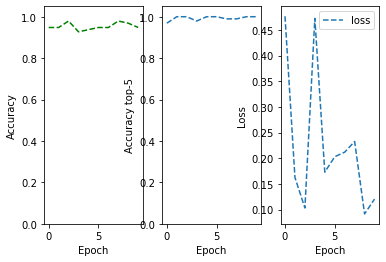

In [152]:
plot_hist(history)

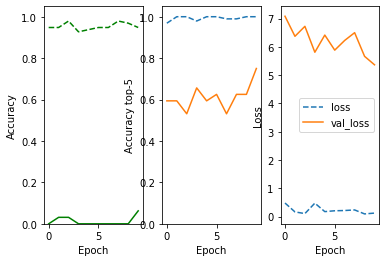

In [153]:
plot_hist_plus(history)

In [149]:
#pd.DataFrame(history.history).to_json("lulu.json")

In [158]:
model.summary()
#tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=96)


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [155]:
#model.save("model_V1.h5")

## Modèle tftimm

In [159]:
model = tfimm.create_model("vit_tiny_patch16_224", dtype="float32", pretrained=False)

In [161]:
model.compile(optimizer="Adam", 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy', 'sparse_top_k_categorical_accuracy'])

In [163]:
hist = model.fit(train_generator)

KeyboardInterrupt: 

In [ ]:
tfimm.list_models()

['cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gmixer_12_224',
 'gmixer_24_224',
 'gmlp_b16_224',
 'gmlp_s16

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names
)

Found 2072 files belonging to 10 classes.
Using 1658 files for training.
['1373231', '1393242', '1393414', '1396159', '1409238', '1411462', '1412445', '1413751', '1414746', '1418140']
